In [1]:
import pandas as pd
import seaborn as sns
true = pd.read_csv('data/True.csv')
fake = pd.read_csv('data/Fake.csv')
true.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [2]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [3]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [4]:
true['label'] = 1
fake['label'] = 0
frames = [true.loc[:][:], fake.loc[:][:]]
df = pd.concat(frames)
df.tail()

,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [5]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


<AxesSubplot: xlabel='label', ylabel='count'>

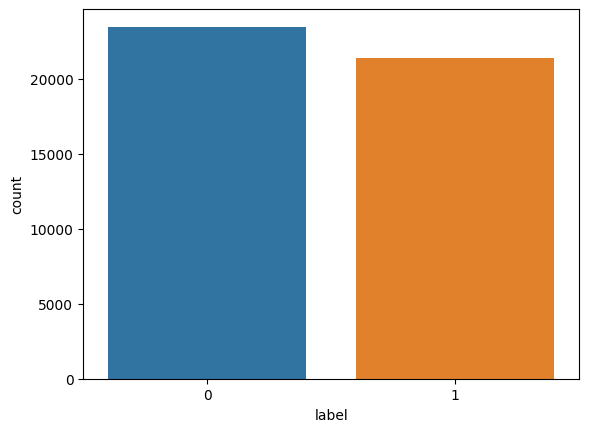

In [6]:


df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month


sns.countplot(data = df, x = 'label')

<AxesSubplot: xlabel='Year', ylabel='count'>

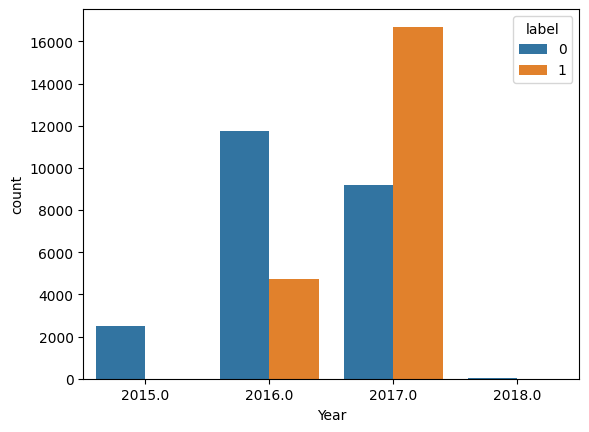

In [7]:

sns.countplot(data = df, x = "Year", hue = "label")

<AxesSubplot: xlabel='Month', ylabel='count'>

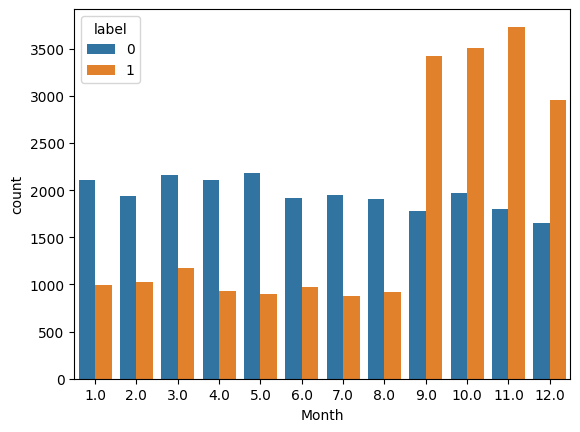

In [8]:

sns.countplot(data = df, x = "Month", hue="label")

In [9]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

<AxesSubplot: xlabel='Year', ylabel='count'>

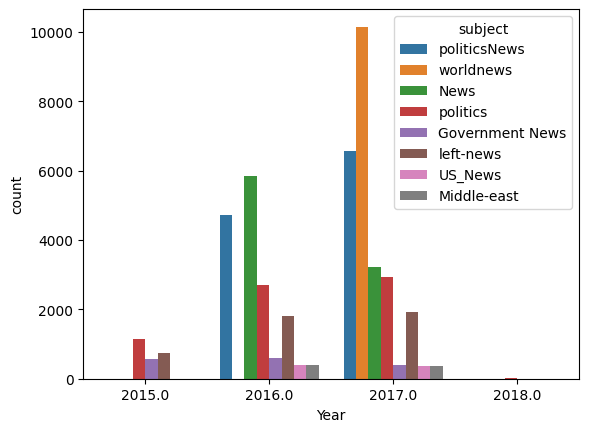

In [10]:

sns.countplot(data = df, x = "Year", hue="subject")
 


In [15]:
# Separate the value
# frames = [true.loc[:200][:], fake.loc[:200][:]]
frames = [true.head(200), fake.head(200)]
df = pd.concat(frames)
X = df.drop('label', axis = 1)
y = df['label']


df = df.dropna()
df2 = df.copy()
df2.reset_index(inplace = True)
# df2
# X
# df2
df2

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...,...
395,195,Nursing Textbooks Recalled And Apology Issued...,"Pearson, an educational publishing company, is...",News,"October 23, 2017",0
396,196,Trump SCREAMS On Twitter After Seeing A Poll ...,Rex Tillerson was right. Donald Trump is a f*c...,News,"October 22, 2017",0
397,197,Trump And John Kelly Just Got RIPPED APART By...,Donald Trump and his disgraceful team deserve ...,News,"October 21, 2017",0
398,198,NRA Releases Fascist Ad Calling All Trump Cri...,The First Amendment of the United States Const...,News,"October 21, 2017",0


In [14]:
# Text processing 


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk

nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:

from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
tfidf_v = TfidfVectorizer()
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# import numpy as np
# import itertools
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.950


Text(0.5, 1.0, 'Confusion Matrix')

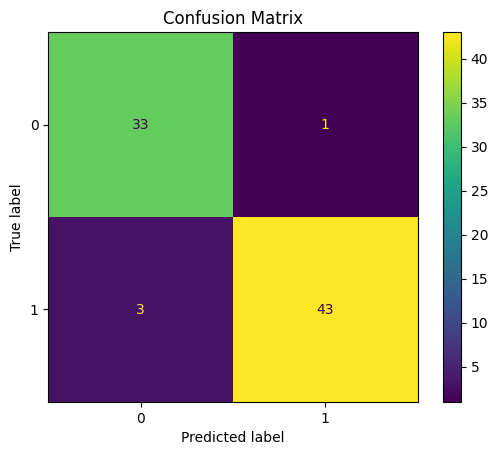

In [40]:

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title("Confusion Matrix")


In [41]:
# Tokenization
review = re.sub('[^a-zA-Z]', ' ', fake['text'][100])
review = review.lower()
review = review.split() 
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
val = tfidf_v.transform([review]).toarray()
classifier.predict(val)


array([0], dtype=int64)

In [42]:
import pickle
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

In [28]:
# Load model and vectorizer
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
val_pkl = joblib_vect.transform([review]).toarray()
joblib_model.predict(val_pkl)

array([0], dtype=int64)

In [29]:
model = pickle.load(open('model2.pkl', 'rb'))
tfidfvect = pickle.load(open('tfidfvect2.pkl', 'rb'))

In [44]:
def predict(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    review_vect = tfidfvect.transform([review]).toarray()
    prediction = 'FAKE' if model.predict(review_vect) == 0 else 'REAL'
    return prediction

text = "Former CIA Openly Suggests He’s Like A Dictator"
prediction = predict(text)
print(prediction)

FAKE
